# Natural Language Processing

Natural Language Processing (NLP) is an important part of Machine Learning. In Python there is a good library called as Natural Language Toolkit (NLTK).

The NLTK toolkit can be installed first with PIP/Conda

`pip install nltk` or 
`conda install nltk`

For downloading and parsing web content, it is also necessary to install packages 

`pip install requests beautifulsoup4` or 
`conda install requests beautifulsoup4`

Then import it and download some additional components of nltk and sample data (corpus). You can even download them all, since they do not require huge amount of disk space

Regular experssions are also very usefull for many kinds of general text processing. Learn how to use [Python RE](https://docs.python.org/3/howto/regex.html).

In [2]:
# You can use an interactive console side by side with the notebook
# by starting the Qt-console
%qtconsole

In [276]:
# Standard libraries to be used
import matplotlib.pyplot as plt
import numpy as np

# Library for making web requests and parsing text from web page
# These are needed now only, because we want to get text from the 
# web page
import requests 
from bs4 import BeautifulSoup

# A regular experssion library. This is very usefull for text processing
import re

# Import the NLTK library
import nltk

# Run this, if you want to download more modules from the net
# nltk.download()

## Read data from a web page

In [322]:
## Read INCUBATE project's web page
url='https://www.uwasa.fi/en/research/projects/indoor-navigation-cubesat-technology-incubate'
html_text = requests.get(url).text

# And parse the text out from the page
soup = BeautifulSoup(html_text, 'html.parser')
print(soup.title)
print("")

# Use regular expressions to replace a strig of spaces and newlines with a single space
alltext=re.sub('[\n ]+', ' ', soup.text)
text=alltext[1341:-281]
print(text)

# Write the actual content into a file for later use
with open('data/digieco.txt', 'w') as fid:
    fid.write(text)

<title>INdoor navigation from CUBesAt TEchnology (INCUBATE) | University of Vaasa</title>

The project will research the application of small satellite technology for precise positioning of indoor spaces and navigation. A new small satellite will also be designed in the project. A sufficiently accurate positioning service that works seamlessly in outdoor and indoor spaces does not currently exist. GPS does not work reliably indoors and between high buildings in cities, not to mention telling the room or floor of the location. – A solution for precise positioning, navigation and timing can be found by utilising LEO small satellites that orbit the earth at a low altitude. They send a stronger signal to the earth than the traditional positioning satellites and orbit the earth faster than them, even in 40 minutes. If proposals about building an internet based on small satellites are realised, there will be about 50,000 active satellites orbiting the earth in ten years,  In the three-year I

## Split the text into words and sentences

In [314]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [323]:
sentences=sent_tokenize(text)
words=word_tokenize(text)
print(len(sentences))
print(len(words))
print(words[:20])
print("")
for i in range(3):
    print(i, ":", sentences[i])

17
450
['The', 'project', 'will', 'research', 'the', 'application', 'of', 'small', 'satellite', 'technology', 'for', 'precise', 'positioning', 'of', 'indoor', 'spaces', 'and', 'navigation', '.', 'A']

0 : The project will research the application of small satellite technology for precise positioning of indoor spaces and navigation.
1 : A new small satellite will also be designed in the project.
2 : A sufficiently accurate positioning service that works seamlessly in outdoor and indoor spaces does not currently exist.


## Remove common words
The text contains plenty of small words, which are common in all texts, and they are not therefore very useful in analyzing the context of a specific piece of text. These stop words are often removed.

Computer usually assumes that lowercase and uppercase are different, but the case does not matter in the meaning of the words. Therefore all words are usually normalized to small case characters before further analysis.

In [328]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

filtered_words=[]
for word in words:
    lcword = word.casefold()
    # Skip words containing digits
    if re.match('\d+', lcword):
        continue
    # Skip stop words and punctuations 
    if lcword not in stop_words:
        filtered_words.append(lcword)

print(len(filtered_words))
filtered_words[:20]

294


['project',
 'research',
 'application',
 'small',
 'satellite',
 'technology',
 'precise',
 'positioning',
 'indoor',
 'spaces',
 'navigation',
 '.',
 'new',
 'small',
 'satellite',
 'also',
 'designed',
 'project',
 '.',
 'sufficiently']

## Stemming

The same word may have different forms, such as design, designing, designs. Stemming means finding the root of the word in order to make the computer to understand that the word is the same, even if it is in different form.

In [329]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = SnowballStemmer(language='english') # Finnish is also supported :)

print(stemmer.stem('designing'), stemmer.stem('designs'), stemmer.stem('design'))
stemmed_words = [stemmer.stem(word) for word in filtered_words]

design design design


In [331]:
print("%20s %20s" % ('Original', 'Stem'))
print(" "*10 + "-"*35)
for i in range(15):
    print("%20s %20s" % (filtered_words[i], stemmed_words[i]))


            Original                 Stem
          -----------------------------------
             project              project
            research             research
         application               applic
               small                small
           satellite             satellit
          technology            technolog
             precise               precis
         positioning                posit
              indoor               indoor
              spaces                space
          navigation                navig
                   .                    .
                 new                  new
               small                small
           satellite             satellit


## Lemmatizing

Changes words to their basic forms, so that all output words are proper words, not only the stems.
Lemma is the basic form of the word, which represents a group of words.

In [336]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [337]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("%20s, %20s, %20s" % ('Original', 'Stem', 'Lemmatized'))
print(" "*10 + "-"*55)
for i in range(25):
    print("%20s, %20s, %20s" % (filtered_words[i], stemmed_words[i], lemmatized_words[i]))


            Original,                 Stem,           Lemmatized
          -------------------------------------------------------
             project,              project,              project
            research,             research,             research
         application,               applic,          application
               small,                small,                small
           satellite,             satellit,            satellite
          technology,            technolog,           technology
             precise,               precis,              precise
         positioning,                posit,          positioning
              indoor,               indoor,               indoor
              spaces,                space,                space
          navigation,                navig,           navigation
                   .,                    .,                    .
                 new,                  new,                  new
               small,   

In [338]:
# The position of the word can be specically adjusted, now as adjective, noun is the default
print(lemmatizer.lemmatize("worst", pos="n"))
print(lemmatizer.lemmatize("worst", pos="a"))

worst
bad


## Finding the parts of speech

*Sanaluokat*

`nltk.help.upenn_tagset()`

 - DT=Determiner <br>
 - JJ=Adjective
 - NN=Noun
 - MD=Modal auxiliary
 - RB=Adverb
 - VB=Verb
 - VBN=Verb, past participle
 - WDT=WH determiner
 - VBZ=Verb, preset tense
 - ...

In [339]:
tags=nltk.pos_tag(words)
tags[:20]

[('The', 'DT'),
 ('project', 'NN'),
 ('will', 'MD'),
 ('research', 'NN'),
 ('the', 'DT'),
 ('application', 'NN'),
 ('of', 'IN'),
 ('small', 'JJ'),
 ('satellite', 'NN'),
 ('technology', 'NN'),
 ('for', 'IN'),
 ('precise', 'JJ'),
 ('positioning', 'NN'),
 ('of', 'IN'),
 ('indoor', 'JJ'),
 ('spaces', 'NNS'),
 ('and', 'CC'),
 ('navigation', 'NN'),
 ('.', '.'),
 ('A', 'DT')]

In [333]:
# Select all verbs, print first 10
tagsarray=np.array(tags)
i=tagsarray[:,1]=='VB'
tagsarray[i][:10]

array([['be', 'VB'],
       ['work', 'VB'],
       ['mention', 'VB'],
       ['–', 'VB'],
       ['be', 'VB'],
       ['orbit', 'VB'],
       ['be', 'VB'],
       ['study', 'VB'],
       ['be', 'VB'],
       ['offer', 'VB']], dtype='<U15')

In [334]:
# Select all nouns, print first 10
tagsarray=np.array(tags)
i=tagsarray[:,1]=='NN'
tagsarray[i][:10]

array([['project', 'NN'],
       ['research', 'NN'],
       ['application', 'NN'],
       ['satellite', 'NN'],
       ['technology', 'NN'],
       ['positioning', 'NN'],
       ['navigation', 'NN'],
       ['satellite', 'NN'],
       ['project', 'NN'],
       ['positioning', 'NN']], dtype='<U15')

In [335]:
# Select all adjectives, print first 10
tagsarray=np.array(tags)
i=tagsarray[:,1]=='JJ'
tagsarray[i][:10]

array([['small', 'JJ'],
       ['precise', 'JJ'],
       ['indoor', 'JJ'],
       ['new', 'JJ'],
       ['small', 'JJ'],
       ['accurate', 'JJ'],
       ['indoor', 'JJ'],
       ['high', 'JJ'],
       ['small', 'JJ'],
       ['low', 'JJ']], dtype='<U15')

## Parsing grammar

A simple syntax of a grammar can be defined using a template with syntax resembling regular expressions, as follows:

A noun phrase *NP* is a sentence which starts with optional determiner *DT* and can have zero or more adjectives *JJ* and it must have a noun *NN* in the end. 

The Regexp Parser can use this grammatic rule and find the sentences matching to this rule from the text:

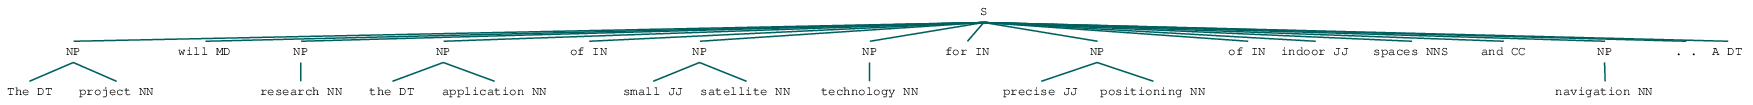

In [342]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunk_parser = nltk.RegexpParser(grammar)
tree = chunk_parser.parse(pos_tags[:20])
tree

## Finding named entities

Named entity recognizer can be used for finding named entities such as persons, organizations, locations, times, facilities or geographical locations (GPE).

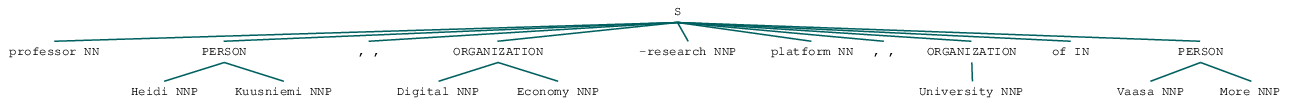

In [350]:
#tree = nltk.ne_chunk(pos_tags[140:160])
tree = nltk.ne_chunk(pos_tags[-43:-30])
tree

In [351]:
# List all named entities in the text
ne = nltk.ne_chunk(pos_tags, binary=True)
for e in ne:
    if hasattr(e, "label") and e.label() == "NE":
        print(e)

(NE GPS/NNP)
(NE LEO/NNP)
(NE INdoor/NNP)
(NE CUBesAt/NNP Technology/NNP)
(NE INCUBATE/NNP)
(NE PNT/NNP)
(NE University/NNP)
(NE Vaasa/NNP)
(NE Digital/NNP Economy/NNP)
(NE Heidi/NNP Kuusniemi/NNP)
(NE International/NNP Business/NNP)
(NE Arto/NNP Ojala/NNP)
(NE International/NNP Business/NNP)
(NE Kendall/NNP Rutledge/NNP)
(NE Petri/NNP Välisuo/NNP)
(NE Jani/NNP Boutellier/NNP)
(NE Mohammed/NNP Elmusrati/NNP)
(NE University/NNP)
(NE Vaasa/NNP)
(NE Future/NNP)
(NE Centennial/NNP Foundation/NNP)
(NE Finnish/NNP Technology/NNP Industries/NNPS)
(NE Jane/NNP)
(NE Aatos/NNP Erkko/NNP Foundation/NNP)
(NE Heidi/NNP Kuusniemi/NNP)
(NE Digital/NNP Economy/NNP)
(NE University/NNP)
(NE Vaasa/NNP More/NNP)
(NE University/NNP)
(NE Vaasa/NNP Project/NNP)
(NE Tampereen/NNP)
(NE Finland/NNP Funding/NNP)
(NE Technology/NNP Industries/NNPS)
(NE Finland/NNP Centennial/NNP Foundation/NNP)


## Corpus
A text parsed for processing is called as Corpus. The NLTK library includes many corpus for testing, but the final goal is of course to make your own corpus for your own analysis.

A corpus can be created from a plain text file, or a full directory of text files using PlaintextXCorpusReader object.

In the example below, the previously written text file is read as a corpus. The filenames can contain wildcards. You may want to import all text files in the data directory using `*.txt` instead of a single filename. 

In [357]:
from nltk.corpus import PlaintextCorpusReader
digieco=PlaintextCorpusReader('./data/', 'digieco.txt')
text = nltk.Text(word_tokenize(digieco.raw()))

### Concordance
When the corpus is ready, it is easy to run many standard tests, for example to study in which context a certain word is used in the text. This is called as concordance.

In [359]:
# The context of a selected word in the corpus
text.concordance('satellite')

Displaying 5 of 5 matches:
 research the application of small satellite technology for precise positioning
paces and navigation . A new small satellite will also be designed in the proje
ipment and software carried by the satellite , to improve navigation solutions 
improve navigation solutions . The satellite signal and its reception must be o
hat a sufficiently high-performing satellite signal can be defined for accurate


### Collocations
Another common task is to find words which are often used together. These collocations can be now easily examined:

In [360]:
# Words frequently mentioned together
text.collocations()

indoor spaces; small satellites; Digital Economy; Heidi Kuusniemi;
International Business; Centennial Foundation; Technology Industries;
accurate positioning; precise positioning; satellite signal; small
satellite; research project


### Lexical dispersion
The dispersion indicates in which location of the document certain word is mentioned. If the corpus contains several documents, it shown in which of them the word is used.

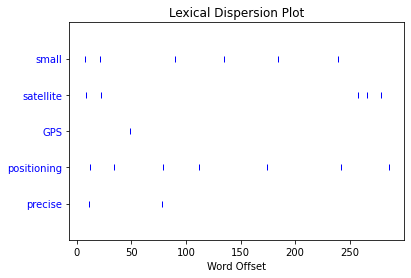

In [267]:
text.dispersion_plot(['small', 'satellite', 'GPS', 'positioning', 'precise'])

### Word statistics

In [361]:
from nltk import FreqDist
frequency_distribution = FreqDist(text)
frequency_distribution.most_common(20)

[('the', 29),
 (',', 19),
 ('of', 16),
 ('.', 16),
 ('and', 15),
 ('in', 11),
 ('project', 10),
 ('positioning', 7),
 ('The', 6),
 ('research', 6),
 ('small', 6),
 ('navigation', 6),
 ('be', 6),
 ('satellites', 6),
 ('will', 5),
 ('satellite', 5),
 ('for', 5),
 ('to', 5),
 ('by', 5),
 ('University', 5)]

In [274]:
meaningful_words = [word for word in text if word.casefold() not in stop_words]
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.most_common(20)

[('project', 10),
 ('positioning', 7),
 ('research', 6),
 ('small', 6),
 ('navigation', 6),
 ('satellites', 6),
 ('satellite', 5),
 ('University', 5),
 ('earth', 4),
 ('Vaasa', 4),
 ('indoor', 3),
 ('spaces', 3),
 ('also', 3),
 ('signal', 3),
 ('Technology', 3),
 ('researchers', 3),
 ('Foundation', 3),
 ('application', 2),
 ('technology', 2),
 ('precise', 2)]

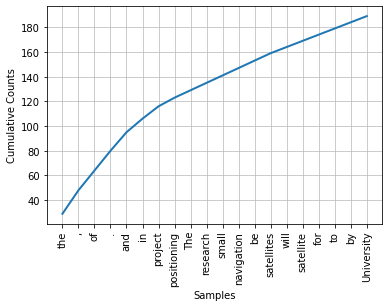

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [362]:
frequency_distribution.plot(20, cumulative=True)

## What next



## More information
 - [Natural Language Processing with Python](https://realpython.com/nltk-nlp-python/)
 - [NLTK-Book: Extracting information from Text](https://www.nltk.org/book/ch07.html)